# Aviation Accidents Analysis

You are part of a consulting firm that is tasked to do an analysis of commercial and passenger jet airline safety. The client (an airline/airplane insurer) is interested in knowing what types of aircraft (makes/models) exhibit low rates of total destruction and low likelihood of fatal or serious passenger injuries in the event of an accident. They are also interested in any general variables/conditions that might be at play. Your analysis will be based off of aviation accident data accumulated from the years 1948-2023. 

Our client is only interested in airplane makes/models that are professional builds and could potentially still be active. Assume a max lifetime of 40 years for a make/model retirement and make sure to filter your data accordingly (i.e. from 1983 onwards). They would also like separate recommendations for small aircraft vs. larger passenger models. **In addition, make sure that claims that you make are statistically robust and that you have enough samples when making comparisons between groups.**


In this summative assessment you will demonstrate your ability to:
- Use Pandas to load, inspect, and clean the dataset appropriately. 
- Transform relevant columns to create measures that address the problem at hand.
- **conduct EDA: visualization and statistical measures to understand the structure of the data**
- **recommend a set of manufacturers to consider as well as specific airplanes conforming to the client's request**
- **discuss the relationship between serious injuries/airplane damage incurred and at least *two* factors at play in the incident. You must provide supporting evidence (visuals, summary statistics, tables) for each claim you make.**

In [223]:
# loading relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis  
- Load in the cleaned data

In [224]:
accident_data_df = pd.read_csv("Cleaned_Accident_Data.csv")
accident_data_df["Make"].value_counts()

Make
Cessna        21488
Piper         11673
Beech          4369
Boeing         2010
Bell           1373
              ...  
Let              53
Mbb              50
Aerostar         49
Raven            31
Schleicher       24
Name: count, Length: 70, dtype: int64

## Explore safety metrics across models/makes
- Remember that the client is interested in separate recommendations for smaller airplanes and larger airplanes. Choose a passenger threshold of 20 and separate the plane types. 

In [225]:
#Dividing planes into less than 20 passengers and greater than and equal to 20
large_plane_df = accident_data_df[accident_data_df["Total.Passengers"] >= 20]
small_plane_df = accident_data_df[accident_data_df["Total.Passengers"] < 20]

In [241]:
# Checking value counts
small_plane_df["Make"].value_counts()

Make
Cessna        21418
Piper         11642
Beech          4314
Bell           1363
Mooney         1040
              ...  
Airbus           35
Raven            31
Bombardier       28
Schleicher       24
Fokker           11
Name: count, Length: 70, dtype: int64

In [227]:
# Checking value counts
large_plane_df["Make"].value_counts()

Make
Boeing                       1330
Mcdonnell douglas             399
Airbus                        256
Embraer                       113
Bombardier                     84
Cessna                         70
Beech                          55
De havilland                   50
Fokker                         44
Lockheed                       40
Aerospatiale                   36
British aerospace              34
Piper                          31
Canadair                       22
Fairchild                      15
Bell                           10
Grumman                         7
Swearingen                      6
Learjet                         4
Mitsubishi                      3
Aero commander                  3
Sikorsky                        3
Gulfstream                      3
Gates learjet                   2
Mooney                          2
Eurocopter                      2
Rockwell                        2
Let                             2
Hughes                          1
North ame

In [228]:
# Removing Makes with fewer than 10 entries for lack of data in large set
value_counts_large = large_plane_df["Make"].value_counts()
restricted_value_counts_large = value_counts_large>=10
restricted_value_counts_large = restricted_value_counts_large[restricted_value_counts_large == False]
drop_list_large = restricted_value_counts_large.index

large_plane_df_cut = large_plane_df[~large_plane_df["Make"].isin(drop_list_large)]

In [229]:
# Rechecking large data
large_plane_df_cut["Make"].value_counts()

Make
Boeing               1330
Mcdonnell douglas     399
Airbus                256
Embraer               113
Bombardier             84
Cessna                 70
Beech                  55
De havilland           50
Fokker                 44
Lockheed               40
Aerospatiale           36
British aerospace      34
Piper                  31
Canadair               22
Fairchild              15
Bell                   10
Name: count, dtype: int64

#### Analyzing Makes

Explore the human injury risk profile for small and larger Makes:
- choose the 15 makes for each group possessing the lowest mean fatal/seriously injured fraction
- plot the mean fatal/seriously injured fraction for each of these subgroups side-by-side

In [230]:
# Grouping large and small planes data by make
large_plane_grouped = large_plane_df_cut.groupby("Make")["Fatality/Serious Injury Ratio"].mean()
small_plane_grouped = small_plane_df.groupby("Make")["Fatality/Serious Injury Ratio"].mean()

# Sorting by ascending injury fraction
sorted_large = large_plane_grouped.sort_values(ascending=True)
sorted_small = small_plane_grouped.sort_values(ascending=True)

In [231]:
# Separating out the lowest 15 in fatality/serious injury ratio for each category to a series and converting each to a DF for graphing
low_15_large = sorted_large.head(15)
low_15_large_df = low_15_large.to_frame()
low_15_small = sorted_small.head(15)
low_15_small_df = low_15_small.to_frame()

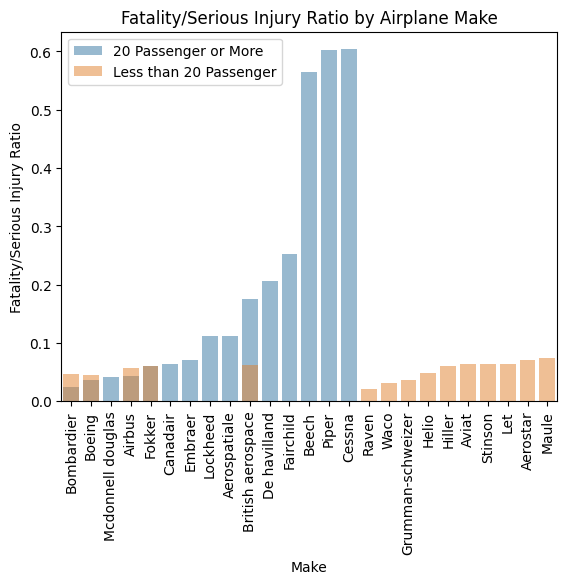

In [244]:
# Creating a bar plot grouped by airplane make and graphing both large and small on the same graph
ax1 = sns.barplot(low_15_large_df, x="Make", y="Fatality/Serious Injury Ratio", alpha =0.5, label = "20 Passenger or More")
ax2 = sns.barplot(low_15_small_df, x="Make", y="Fatality/Serious Injury Ratio", alpha =0.5, label = "Less than 20 Passenger")

# Rotating x-labels for ease of reading
ax1.tick_params(axis='x', rotation=90)
ax2.tick_params(axis='x', rotation=90)

plt.title("Fatality/Serious Injury Ratio by Airplane Make")
plt.show()

**Distribution of injury rates: small makes**

Use a violinplot to look at the distribution of the fraction of passengers serious/fatally injured for small airplane makes. Just display makes with the ten lowest mean serious/fatal injury rates.

In [233]:
# Separating out the lowest 10 small aircraft fatality/serious injury ratio to a series and converting each to a DF for graphing
low_10_small = sorted_small.head(10)
low_10_small_names = low_10_small.index

low_10_small_df = small_plane_df[small_plane_df["Make"].isin(low_10_small_names)]

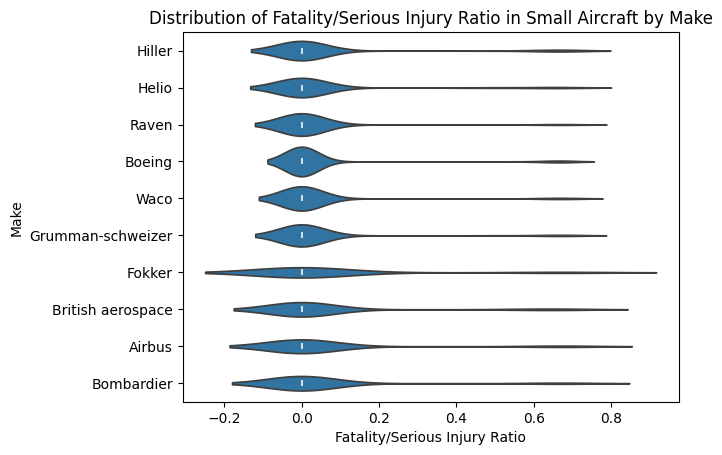

In [234]:
# Violin plot of lowest 10 small aircraft fatality/serious injury ratio
ax=sns.violinplot(low_10_small_df, y="Make", x="Fatality/Serious Injury Ratio")

plt.title("Distribution of Fatality/Serious Injury Ratio in Small Aircraft by Make")
plt.show()

**Distribution of injury rates: large makes**

Use a stripplot to look at the distribution of the fraction of passengers serious/fatally injured for large airplane makes. Just display makes with the ten lowest mean serious/fatal injury rates.

In [242]:
# Separating out the lowest 10 small aircraft fatality/serious injury ratio to a series and converting each to a DF for graphing
low_10_large = sorted_large.head(10)
low_10_large_names = low_10_large.index

low_10_large_df = large_plane_df_cut[large_plane_df_cut["Make"].isin(low_10_large_names)]

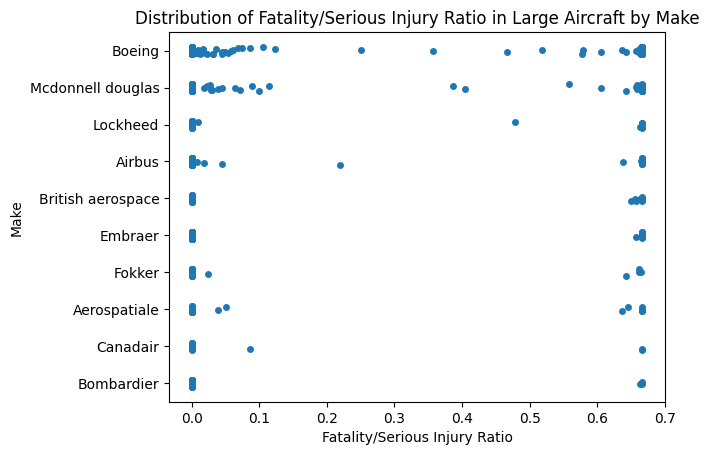

In [243]:
# Strip plot of lowest 10 small aircraft fatality/serious injury ratio
ax=sns.stripplot(low_10_large_df, y="Make", x="Fatality/Serious Injury Ratio")


plt.title("Distribution of Fatality/Serious Injury Ratio in Large Aircraft by Make")
plt.show()

**Evaluate the rate of aircraft destruction for both small and large aircraft by Make.** 

Sort your results and keep the lowest 15.

In [238]:
# Grouping large and small planes data by make
large_plane_destruction = large_plane_df_cut.groupby("Make")["Aircraft Destroyed?"].mean()
small_plane_destruction = small_plane_df.groupby("Make")["Aircraft Destroyed?"].mean()

# Sorting by ascending destruction fraction
sorted_large_destruction = large_plane_destruction.sort_values(ascending=True)
sorted_small_destruction = small_plane_destruction.sort_values(ascending=True)

# Separating out the lowest 15 in Aircraft distruction ratio for each category to a series and converting each to a DF for graphing
low_15_large_destruction = sorted_large_destruction.head(15)
low_15_large_df_destruction = low_15_large_destruction.to_frame()
low_15_small_destruction = sorted_small_destruction.head(15)
low_15_small_df_destruction = low_15_small_destruction.to_frame()

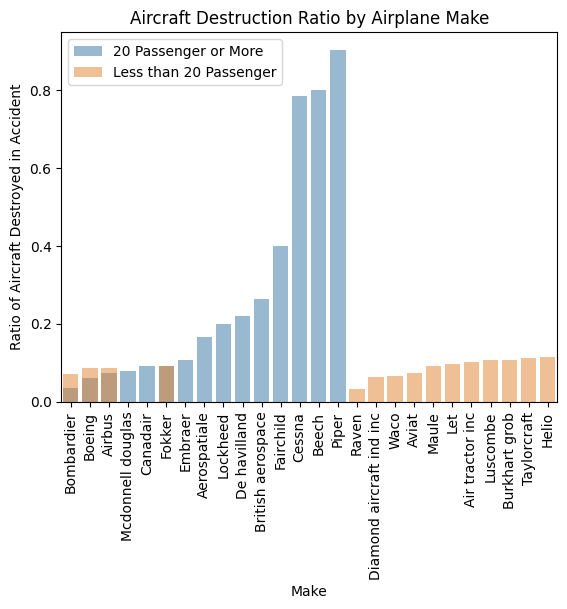

In [239]:
# Creating a bar plot grouped by airplane make and graphing both large and small on the same graph
ax1 = sns.barplot(low_15_large_df_destruction, x="Make", y="Aircraft Destroyed?", alpha =0.5, label = "20 Passenger or More")
ax2 = sns.barplot(low_15_small_df_destruction, x="Make", y="Aircraft Destroyed?", alpha =0.5, label = "Less than 20 Passenger")

# Rotating x-labels for ease of reading
ax1.tick_params(axis='x', rotation=90)
ax2.tick_params(axis='x', rotation=90)

plt.ylabel("Ratio of Aircraft Destroyed in Accident")
plt.title("Aircraft Destruction Ratio by Airplane Make")
plt.show()

#### Provide a short discussion on your findings for your summary statistics and plots:
- Make any recommendations for Makes here based off of the destroyed fraction and fraction fatally/seriously injured
- Comment on the calculated statistics and any corresponding distributions you have visualized.

In [208]:
#Large Craft injury best
sorted_large.head(5)

Make
Bombardier           0.023762
Boeing               0.036781
Mcdonnell douglas    0.041542
Airbus               0.042662
Fokker               0.060356
Name: Fatality/Serious Injury Ratio, dtype: float64

In [245]:
#Large Craft plane survival best
sorted_large_destruction.head(5)

Make
Bombardier           0.035714
Boeing               0.060150
Airbus               0.074219
Mcdonnell douglas    0.077694
Canadair             0.090909
Name: Aircraft Destroyed?, dtype: float64

In [246]:
#Large Craft injury best
sorted_small.head(5)

Make
Raven                0.021505
Waco                 0.030864
Grumman-schweizer    0.037217
Boeing               0.044434
Bombardier           0.047619
Name: Fatality/Serious Injury Ratio, dtype: float64

In [247]:
#Large Craft plane survival best
sorted_small_destruction.head(5)

Make
Raven                       0.032258
Diamond aircraft ind inc    0.063492
Waco                        0.064815
Bombardier                  0.071429
Aviat                       0.073684
Name: Aircraft Destroyed?, dtype: float64

In [ ]:
"""
Among aircraft carrying 20 passengers or more Bombardier and Boeing took the 1 and 2 spots in both passenger safety/survival
in a crash and the likelihood of the craft surviving as well. However, this is based on less than 100 examples for Bombardier and over 1000 for Boeing.
This leads to the conclusion that the statistics are more solid for Boeing as the lead choice in the large aircraft category.

Among craft with fewer than 20 passengers, the results are less clear. Unlike the large craft where three of the top five in each category were
from the largest represented makes, the more common small craft are not in the top 5 in either passenger or plane survival. Raven and Waco make 
the top three in each category, but due to the smaller statistical sample, further research is necessary for a conclusion. This is possibly due to the
larger variation in models among small craft

### Analyze plane types
- plot the mean fatal/seriously injured fraction for both small and larger planes 
- also provide a distributional plot of your choice for the fatal/seriously injured fraction by airplane type (stripplot, violin, etc)  
- filter ensuring that you have at least ten individual examples in each model/make to average over

**Larger planes**

In [276]:
# Removing Makes with fewer than 10 model entries for lack of data
model_counts_large = large_plane_df["Make - Model"].value_counts()
restricted_model_counts_large = model_counts_large>=10
restricted_model_counts_large = restricted_model_counts_large[restricted_model_counts_large == False]
drop_model_large = restricted_model_counts_large.index

large_model_df = large_plane_df[~large_plane_df["Make - Model"].isin(drop_model_large)]

In [277]:
# Grouping large planes by model
large_models_grouped = large_model_df.groupby("Make - Model")["Fatality/Serious Injury Ratio"].mean()

# Sorting by ascending injury fraction
large_models = large_models_grouped.sort_values(ascending=True)
large_models_df = large_models.to_frame()

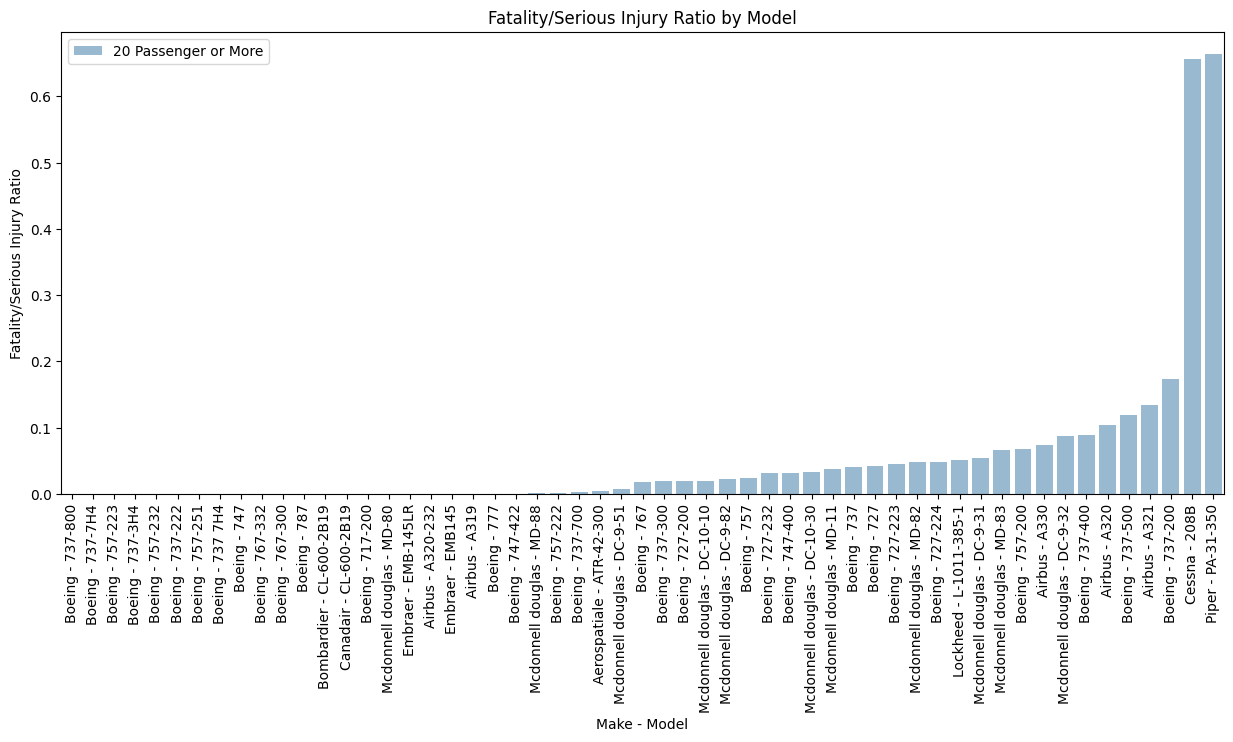

In [283]:
# Setting figure size
plt.figure(figsize=(15,6))
# Creating a bar plot grouped by large airplane model and graphing
ax_large = sns.barplot(large_models_df, x="Make - Model", y="Fatality/Serious Injury Ratio", alpha =0.5, label = "20 Passenger or More")

# Rotating x-labels for ease of reading
ax_large.tick_params(axis='x', rotation=90)

plt.title("Fatality/Serious Injury Ratio by Model")
plt.show()

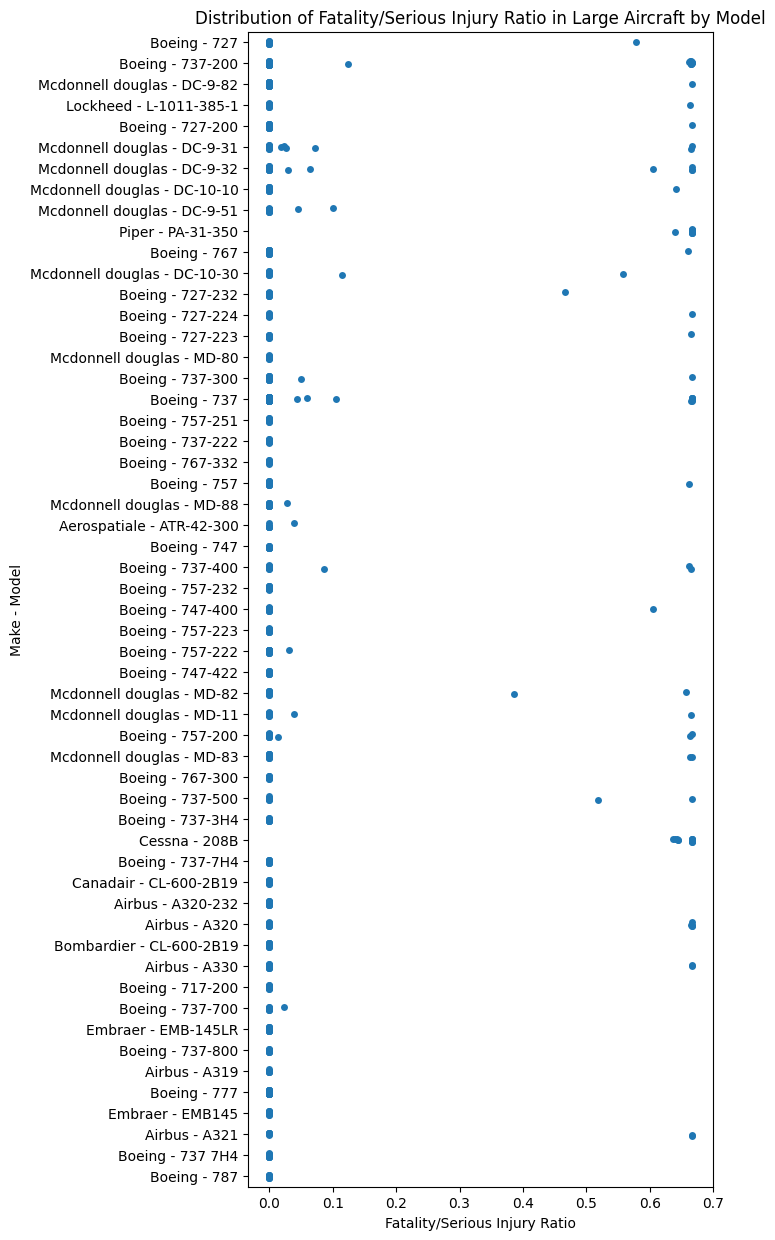

In [287]:
# Strip plot of lowest 10 small aircraft fatality/serious injury ratio
plt.figure(figsize=(6,15))

ax=sns.stripplot(large_model_df, y="Make - Model", x="Fatality/Serious Injury Ratio")


plt.title("Distribution of Fatality/Serious Injury Ratio in Large Aircraft by Model")
plt.show()

**Smaller planes**
- for smaller planes, limit your plotted results to the makes with the 10 lowest mean serious/fatal injury fractions

In [307]:
# Removing Makes with fewer than 100 model entries for lack of statistical significance
model_counts_small = small_plane_df["Make - Model"].value_counts()
restricted_model_counts_small = model_counts_small>=100
restricted_model_counts_small = restricted_model_counts_small[restricted_model_counts_small == False]
drop_model_small = restricted_model_counts_small.index

small_model_df = small_plane_df[~small_plane_df["Make - Model"].isin(drop_model_small)]

In [308]:
# Grouping small planes data by model
small_model_grouped = small_model_df.groupby("Make - Model")["Fatality/Serious Injury Ratio"].mean()

# Sorting by ascending injury fraction
sorted_small_model = small_model_grouped.sort_values(ascending=True)

In [309]:
# Separating out the lowest 15 in fatality/serious injury ratio for each category to a series and converting each to a DF for graphing
low_model_small = sorted_small_model.head(10)
low_mode_small_df = low_model_small.to_frame()

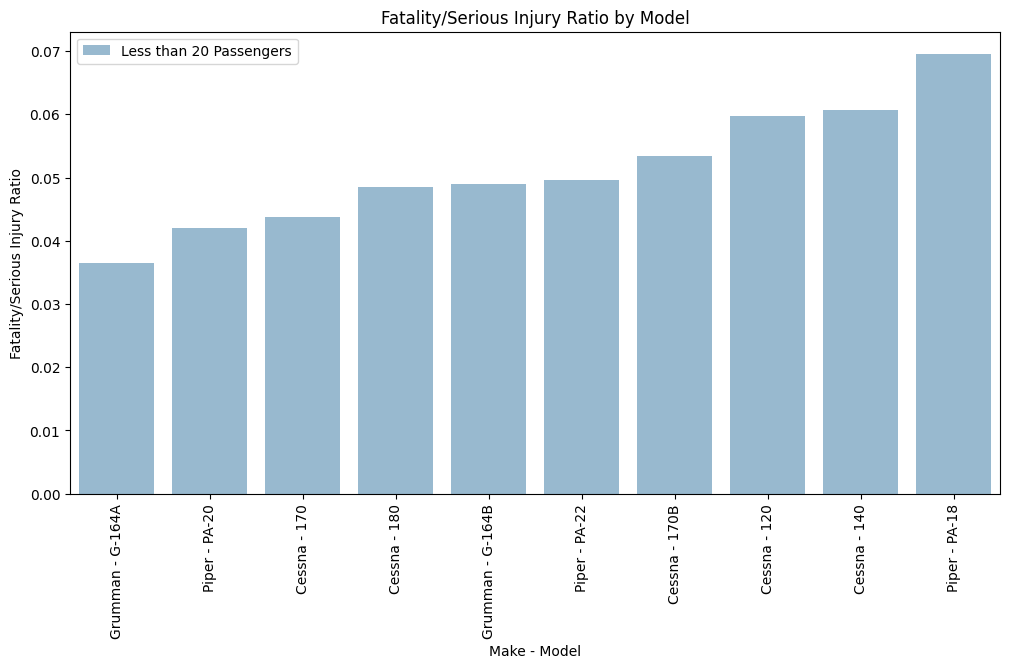

In [310]:
# Setting figure size
plt.figure(figsize=(12,6))
# Creating a bar plot grouped by large airplane model and graphing
ax_small = sns.barplot(low_mode_small_df, x="Make - Model", y="Fatality/Serious Injury Ratio", alpha =0.5, label = "Less than 20 Passengers")

# Rotating x-labels for ease of reading
ax_small.tick_params(axis='x', rotation=90)

plt.title("Fatality/Serious Injury Ratio by Model")
plt.show()

### Discussion of Specific Airplane Types
- Discuss what you have found above regarding passenger fraction seriously/ both small and large airplane models.

### Exploring Other Variables
- Investigate how other variables effect aircraft damage and injury. You must choose **two** factors out of the following but are free to analyze more:

- Weather Condition
- Engine Type
- Number of Engines
- Phase of Flight
- Purpose of Flight

For each factor provide a discussion explaining your analysis with appropriate visualization / data summaries and interpreting your findings.